In [114]:
import pandas as pd
import numpy as np

In [115]:
# columns we'll be focusing on
data_i_want = ['year', 'month', 'day', 'HourlyDryBulbTemperature']

# start and end years for processing each file
start_years = ['1950', '1960', '1973', '1980', '1990', '2000', '2010']
end_years = ['1959', '1969', '1979', '1989', '1999', '2009', '2019']

# overall dataframes for concatenating each file's dataframe to
days_below_32 = pd.DataFrame()
winter_mean_temps = pd.DataFrame()
summer_mean_temps = pd.DataFrame()

for i in range(7):
    # grabbing temperature data 
    print("Processing KenaiAirportLCD_{}-01-01-{}-12-31.csv...".format(start_years[i], end_years[i]))
    data = pd.read_csv("data/weather-data/KenaiAirportLCD_{}-01-01-{}-12-31.csv".format(start_years[i], end_years[i]))
    data['DATE'] = pd.to_datetime(data['DATE'])
    data['year'], data['month'], data['day'] = data['DATE'].dt.year, data['DATE'].dt.month, data['DATE'].dt.day
    temps = pd.DataFrame(data[data_i_want])
    temps['HourlyDryBulbTemperature'] = temps['HourlyDryBulbTemperature'].map(lambda x: str(x).rstrip('s'))
    
    # some files have *'s listed in the HourlyDryBulbTemperature - we need to drop these entries
    remove_star = temps[temps['HourlyDryBulbTemperature'] == '*'].index
    temps.drop(remove_star, axis=0, inplace=True)
    
    # process the newly cleaned column as float for max calculation
    temps['HourlyDryBulbTemperature'] = temps['HourlyDryBulbTemperature'].astype(float)
    
    # group by year/month/day and find the max temperature for that day
    daily_temp_max = temps.groupby(['year','month','day']).max()
    
    # count the number of days that stayed below 32° all day
    temp_count = daily_temp_max[(daily_temp_max['HourlyDryBulbTemperature'] < 32)].groupby('year').count()
    
    # concatenate the counted dataframe with the other dataframes from prior years
    days_below_32 = pd.concat([days_below_32, temp_count])
    
    # grabbing mean temps for winter months by year and concatenating with other dataframes
    winter_temps = temps[(temps['month'] == 12) | (temps['month'] == 1) | (temps['month'] == 2)]
    winter_daily_means = winter_temps.groupby(['year', 'month', 'day']).mean()
    winter_means = winter_daily_means.groupby(['year']).mean()
    winter_mean_temps = pd.concat([winter_mean_temps, winter_means])
    
    # grabbing mean temps for summer months by year and concatenating with other dataframes
    summer_temps = temps[(temps['month'] == 7) | (temps['month'] == 8) | (temps['month'] == 9)]
    summer_daily_means = summer_temps.groupby(['year', 'month', 'day']).mean()
    summer_means = summer_daily_means.groupby(['year']).mean()
    summer_mean_temps = pd.concat([summer_mean_temps, summer_means])
    
days_below_32.rename(columns={'HourlyDryBulbTemperature' : "Days Below 32°F"}, inplace=True)
days_below_32
    

Processing KenaiAirportLCD_1950-01-01-1959-12-31.csv...
Processing KenaiAirportLCD_1960-01-01-1969-12-31.csv...
Processing KenaiAirportLCD_1973-01-01-1979-12-31.csv...
Processing KenaiAirportLCD_1980-01-01-1989-12-31.csv...
Processing KenaiAirportLCD_1990-01-01-1999-12-31.csv...
Processing KenaiAirportLCD_2000-01-01-2009-12-31.csv...
Processing KenaiAirportLCD_2010-01-01-2019-12-31.csv...


C:\Users\kjcro\Anaconda3\envs\RuncastJupyter\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (42,43,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\kjcro\Anaconda3\envs\RuncastJupyter\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,49,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\kjcro\Anaconda3\envs\RuncastJupyter\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,49,50,51,56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\kjcro\Anaconda3\envs\RuncastJupyter\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (41,42,43,46,49,56) have mixed types.Specify dtype 

,Days Below 32°F
year,
1950,114
1951,111
1952,89
1953,102
1954,115
...,...
2015,78
2016,62
2017,117


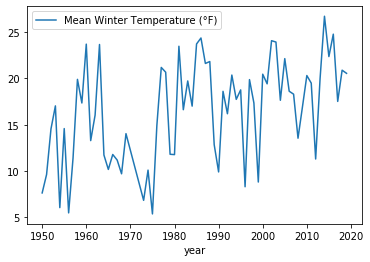

In [116]:
winter_mean_temps.rename(columns={'HourlyDryBulbTemperature' : 'Mean Winter Temperature (°F)'}, inplace=True)
winter_mean_temps.plot()

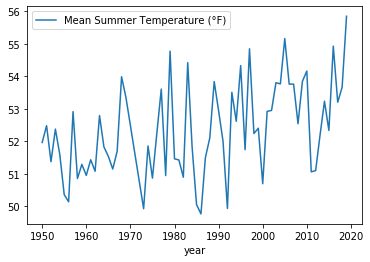

In [117]:
summer_mean_temps.rename(columns={'HourlyDryBulbTemperature' : 'Mean Summer Temperature (°F)'}, inplace=True)
summer_mean_temps.plot()